# 1. Importar Dependencias
---

In [30]:
import pandas as pd
import geopandas as gpd

# 2. Definición de la clase Mapa
---

In [31]:
csv_file = 'costarica_biodata.csv'
shape_file = 'CRI_adm1.shp'
shape_file_ac = 'AC_W84.shp'

areas = ["La Amistad Caribe", "Osa", "Tortuguero", "La Amistad Pacífico", "Central",
         "Pacífico Central", "Arenal Huetar Norte", "Arenal Tempisque", "Tempisque", "Guanacaste"]

provinces = ["Alajuela", "Cartago", "Guanacaste", "Heredia", "Limón", "Puntarenas", "San José"]

headers = [
    'occurrenceID', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species',
    'scientificName', 'stateProvince', 'year','month', 'decimalLatitude', 'decimalLongitude'
]

In [26]:
class Mapa:
    def __init__(self, specie, year="", area="", by_areas=False):
        self.year = year
        self.specie = specie

        # Column and geoDataFrame asignation by area or porvince
        if by_areas:
            self.area = ""
            self.column = "Areas Conservacion"
            self.gdf = gpd.read_file(shape_file_ac)
            self.gdf[self.column] = areas

        else:
            self.area = area
            self.column = "Provincias"
            self.gdf = gpd.read_file(shape_file)
            self.gdf[self.column] = provinces

        self.df = self.set_dataFrame(csv_file)

    def set_dataFrame(self, file_path):
        # References
        specie, year, area, = self.specie, self.year, self.area

        # Instance
        df = pd.read_csv(csv_file)
        df = df[headers]

        # Filters
        df = df[df['species'] == specie]

        if year:
            df = df[df['year'] == year]

        if area and area in provinces:
            df = df[df['stateProvince'] == area]

        return df



    def get_counts_per_year(self):
        return self.df["year"].value_counts().plot(
            kind='barh',
            title = 'Cantidad de Ocurrencias por año',
            xlabel='Número de ocurrencias',
            ylabel='Año'
        )


    def get_counts_per_province(self):
        return self.df["stateProvince"].value_counts().plot(
            kind='pie',
            autopct='%1.1f%%',
            figsize=(5, 5),
            ylabel = 'Provincias',
            title="Porcentaje de especies por provincia",
        )





    def get_title(self):
        # References
        specie, year, area, = self.specie, self.year, self.area
        title = ""

        # Provinces validation
        if area and area in provinces:
            title += f"{specie} en {area}"

        else:
            title += f"{specie} en Costa Rica"

        # Year validation
        if year:
            title += f", {year}"

        title += "."
        return title


    def plot(self):
        # References
        df, gdf, area, column = self.df, self.gdf, self.area, self.column

        if area and area in provinces:
            # Filter the geoDataFrame
            cond = gdf[column] == area
            axis = gdf[cond].plot()

        else:
            axis = gdf.plot(
                figsize = (6,6),
                column=column,
                categorical=True,
                legend=True,
                legend_kwds = {"loc": "center left", "bbox_to_anchor": (1, .5)}
            )
            # Legends
            leg = axis.get_legend()
            leg.set_title(f"{column}")

        # Title
        axis.set_title(self.get_title())

        # Labels
        axis.set_xlabel("Longitud")
        axis.set_ylabel("Latitud")

        # Points
        points = gpd.points_from_xy(df.decimalLongitude, df.decimalLatitude)
        geo_df= gpd.GeoDataFrame(df, geometry=points)
        geo_df.plot(ax=axis, color="black", markersize=6)

# 3. Crear mapas
---

Datos a utilizar

    Especies:                      Provincias:          Áreas de conservación:
    - Chelonia mydas               - Alajuela           - La Amistad Caribe
    - Oophaga granulifera          - Cartago            - Osa
    - Tayassu pecari               - Guanacaste         - Tortuguero
    - Amazilia boucardi            - Heredia            - La Amistad Pacífico
    - Habia atrimaxillaris         - Limón              - Central
    - Ara ambiguus                 - Puntarenas         - Pacífico Central
                    	                                - Arenal Huetar Norte
                    	                                - Arenal Tempisque
                    	                                - Tempisque
                    	                                - Guanacaste

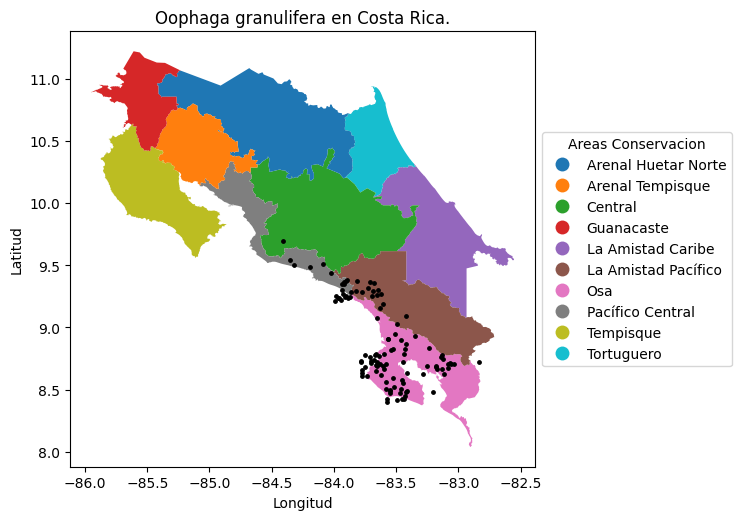

In [50]:
#Generar mapa por areas de conservación
crc, all = "", ""

year = all
specie = "Oophaga granulifera"

area = " "
areas_conservacion = True
#areas_conservacion = False

map = Mapa(
    specie = specie,
    year = year,
    area = area,
    by_areas = areas_conservacion
)

map.plot()

In [45]:
#Generar dataframe por provincias
map.gdf


,geometry,Areas Conservacion
0,"MULTIPOLYGON (((-83.54260 9.97478, -83.54267 9...",La Amistad Caribe
1,"POLYGON ((-82.90321 8.73373, -82.90317 8.73357...",Osa
2,"POLYGON ((-83.69448 10.93883, -83.69312 10.938...",Tortuguero
3,"POLYGON ((-83.49122 9.61393, -83.44427 9.61357...",La Amistad Pacífico
4,"POLYGON ((-84.01143 10.44435, -84.01105 10.444...",Central
5,"POLYGON ((-84.82622 10.33726, -84.82587 10.337...",Pacífico Central
6,"MULTIPOLYGON (((-84.08375 10.29133, -84.08375 ...",Arenal Huetar Norte
7,"POLYGON ((-85.09671 10.78235, -85.09685 10.746...",Arenal Tempisque
8,"POLYGON ((-85.43350 10.44009, -85.43309 10.439...",Tempisque
9,"POLYGON ((-85.35777 11.12638, -85.22911 11.063...",Guanacaste


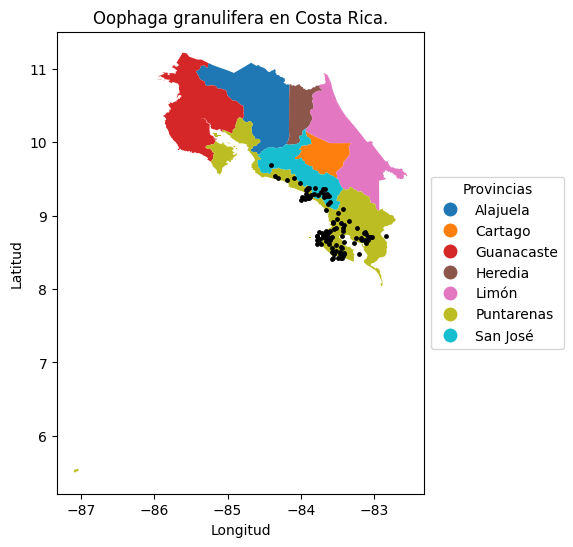

In [51]:
#Generar mapa por provincias
crc, all = "", ""

year = all
specie = "Oophaga granulifera"

area = " "
# areas_conservacion = True
areas_conservacion = False

map = Mapa(
    specie = specie,
    year = year,
    area = area,
    by_areas = areas_conservacion
)

map.plot()

In [52]:
#Generar dataframe por provincias
map.gdf


,geometry,Provincias
0,"POLYGON ((-84.67788 11.07885, -84.60770 11.038...",Alajuela
1,"POLYGON ((-83.81220 10.08073, -83.78162 10.063...",Cartago
2,"MULTIPOLYGON (((-85.51458 9.85958, -85.51458 9...",Guanacaste
3,"POLYGON ((-84.01901 10.78329, -84.01370 10.775...",Heredia
4,"MULTIPOLYGON (((-82.61597 9.63208, -82.61597 9...",Limón
5,"MULTIPOLYGON (((-87.04792 5.55681, -87.04792 5...",Puntarenas
6,"POLYGON ((-83.85669 9.98385, -83.86128 9.97473...",San José


Axes(0.125,0.11;0.775x0.77)


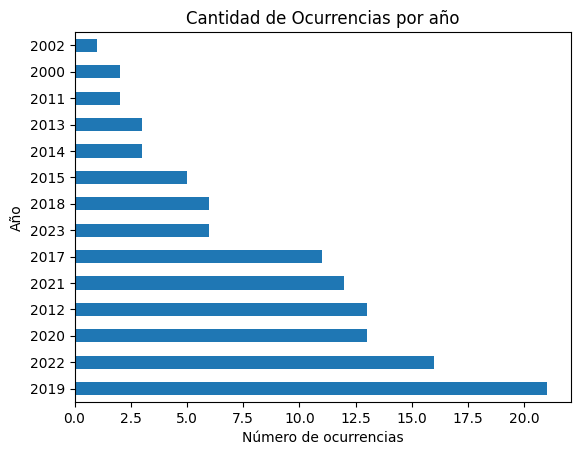

In [ ]:
# Imprimir gráfico de barras horizontal de ocurrencias por año
print(map.get_counts_per_year())

Axes(0.1275,0.11;0.77x0.77)


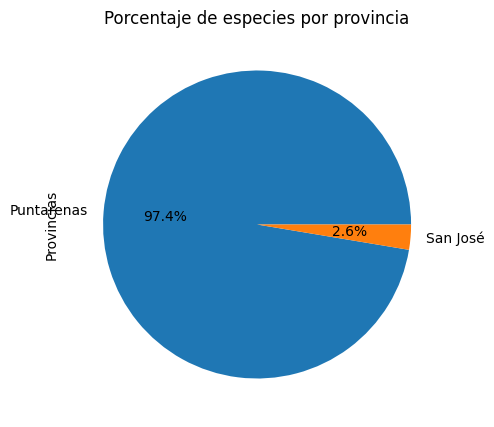

In [ ]:
# Imprimir gráfico pie de especies por provincia
print(map.get_counts_per_province())

In [ ]:
import random

especies = ["Chelonia mydas", "Oophaga granulifera", "Tayassu pecari ", "Amazilia boucardi  ", "Habia atrimaxillaris", "Ara ambiguus"]

random.shuffle(especies)
especies

['Ara ambiguus',
 'Chelonia mydas',
 'Tayassu pecari ',
 'Amazilia boucardi  ',
 'Habia atrimaxillaris',
 'Oophaga granulifera']